In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_census=pd.read_csv('census.csv')
df_census

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


We will define the column name as described in the documentation

In [7]:
df_census.columns=["Age","Workclass","Fnlwgt","Education","Education-num","Marital-status","Occupation","Relationship","Race","Sex","Capital-gain","Capital-loss","Hours-per-week","Native-Country","Income Range"]

df_census.head(10)

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-Country,Income Range
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


The given dataset is the census for income range of group of working class people with all their details.Based on the different factors salary range has been provided such that we can predict the future salary range for other individual with our model. There are 14 indepedent features and Income Range as Dependent feature.

Let us split the dataset into dependent and independent features:

In [8]:
df_census1=df_census.iloc[:,:-1]
y=df_census.iloc[:,-1]
df_census1

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-Country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [9]:
#The above dataset has 14 independent features in which "Marital -Status","Relationship","Race" and "Native- Country" will not have any impact in the decision of Income range and are categorical feature. So we will drop all these columns.

df_census2=df_census1.drop(['Marital-status','Relationship','Race','Native-Country'],axis=1,errors='ignore')
df_census2

,Age,Workclass,Fnlwgt,Education,Education-num,Occupation,Sex,Capital-gain,Capital-loss,Hours-per-week
0,39,State-gov,77516,Bachelors,13,Adm-clerical,Male,2174,0,40
1,50,Self-emp-not-inc,83311,Bachelors,13,Exec-managerial,Male,0,0,13
2,38,Private,215646,HS-grad,9,Handlers-cleaners,Male,0,0,40
3,53,Private,234721,11th,7,Handlers-cleaners,Male,0,0,40
4,28,Private,338409,Bachelors,13,Prof-specialty,Female,0,0,40
...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Tech-support,Female,0,0,38
32557,40,Private,154374,HS-grad,9,Machine-op-inspct,Male,0,0,40
32558,58,Private,151910,HS-grad,9,Adm-clerical,Female,0,0,40
32559,22,Private,201490,HS-grad,9,Adm-clerical,Male,0,0,20


In [10]:
# Let  us start the EDA process by checking the NUll value in our dataset

df_census2.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education-num     0
Occupation        0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
dtype: int64

In [11]:
# Since the dataset does not contain any null value. We will chcek for the correlation between the columns

df_census2.corr()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
Education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
Capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
Capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
Hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [12]:
#Let us check for the skewness in our dataset

df_census2.skew()

Age                0.558743
Fnlwgt             1.446980
Education-num     -0.311676
Capital-gain      11.953848
Capital-loss       4.594629
Hours-per-week     0.227643
dtype: float64

In [13]:
df_census2.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education-num      int64
Occupation        object
Sex               object
Capital-gain       int64
Capital-loss       int64
Hours-per-week     int64
dtype: object

In [14]:
df_census2.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Occupation,Sex,Capital-gain,Capital-loss,Hours-per-week
0,39,State-gov,77516,Bachelors,13,Adm-clerical,Male,2174,0,40
1,50,Self-emp-not-inc,83311,Bachelors,13,Exec-managerial,Male,0,0,13
2,38,Private,215646,HS-grad,9,Handlers-cleaners,Male,0,0,40
3,53,Private,234721,11th,7,Handlers-cleaners,Male,0,0,40
4,28,Private,338409,Bachelors,13,Prof-specialty,Female,0,0,40


In [15]:
df1=pd.get_dummies(df_census2['Workclass'],drop_first=True)

In [16]:
df2=pd.get_dummies(df_census2['Education'],drop_first=True)

In [17]:
df3=pd.get_dummies(df_census2['Occupation'],drop_first=True)

In [18]:
df4=pd.get_dummies(df_census2['Sex']) 

In [19]:
df_census2=pd.concat([df1,df2,df3,df4,df_census2],axis=1)

In [20]:
df_census2.drop(['Education','Sex','Occupation','Workclass'],axis=1,inplace=True)

In [21]:
df_census2

,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,11th,12th,...,Tech-support,Transport-moving,Female,Male,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,39,77516,13,2174,0,40
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,50,83311,13,0,0,13
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,38,215646,9,0,0,40
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,53,234721,7,0,0,40
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,28,338409,13,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,27,257302,12,0,0,38
32557,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,40,154374,9,0,0,40
32558,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,58,151910,9,0,0,40
32559,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,22,201490,9,0,0,20


Now, we have all the independent features as continuous values. 

In [22]:
df_census2.isnull().sum()

 Federal-gov          0
 Local-gov            0
 Never-worked         0
 Private              0
 Self-emp-inc         0
 Self-emp-not-inc     0
 State-gov            0
 Without-pay          0
 11th                 0
 12th                 0
 1st-4th              0
 5th-6th              0
 7th-8th              0
 9th                  0
 Assoc-acdm           0
 Assoc-voc            0
 Bachelors            0
 Doctorate            0
 HS-grad              0
 Masters              0
 Preschool            0
 Prof-school          0
 Some-college         0
 Adm-clerical         0
 Armed-Forces         0
 Craft-repair         0
 Exec-managerial      0
 Farming-fishing      0
 Handlers-cleaners    0
 Machine-op-inspct    0
 Other-service        0
 Priv-house-serv      0
 Prof-specialty       0
 Protective-serv      0
 Sales                0
 Tech-support         0
 Transport-moving     0
 Female               0
 Male                 0
Age                   0
Fnlwgt                0
Education-num   

In [23]:
# Lets check for the skewness in our dataset.

df_census2.skew()

 Federal-gov           5.563357
 Local-gov             3.553442
 Never-worked         68.183576
 Private              -0.857546
 Self-emp-inc          5.120003
 Self-emp-not-inc      3.146395
 State-gov             4.704155
 Without-pay          48.197512
 11th                  4.975058
 12th                  8.498161
 1st-4th              13.814422
 5th-6th               9.736521
 7th-8th               6.886845
 9th                   7.769804
 Assoc-acdm            5.249078
 Assoc-voc             4.539494
 Bachelors             1.810420
 Doctorate             8.709766
 HS-grad               0.759490
 Masters               3.994395
 Preschool            25.209346
 Prof-school           7.317954
 Some-college          1.324614
 Adm-clerical          2.401738
 Armed-Forces         60.126718
 Craft-repair          2.255688
 Exec-managerial       2.269644
 Farming-fishing       5.458185
 Handlers-cleaners     4.562126
 Machine-op-inspct     3.651161
 Other-service         2.644839
 Priv-ho

In [24]:
# Lets apply Log Transform method to minimise the skewness in the dataset.

for col in df_census2.columns:
    if df_census2.skew().loc[col]>0.55:
        df_census2[col]=np.log1p(df_census2[col])
df_census2.skew()

 Federal-gov           5.563357
 Local-gov             3.553442
 Never-worked         68.183576
 Private              -0.857546
 Self-emp-inc          5.120003
 Self-emp-not-inc      3.146395
 State-gov             4.704155
 Without-pay          48.197512
 11th                  4.975058
 12th                  8.498161
 1st-4th              13.814422
 5th-6th               9.736521
 7th-8th               6.886845
 9th                   7.769804
 Assoc-acdm            5.249078
 Assoc-voc             4.539494
 Bachelors             1.810420
 Doctorate             8.709766
 HS-grad               0.759490
 Masters               3.994395
 Preschool            25.209346
 Prof-school           7.317954
 Some-college          1.324614
 Adm-clerical          2.401738
 Armed-Forces         60.126718
 Craft-repair          2.255688
 Exec-managerial       2.269644
 Farming-fishing       5.458185
 Handlers-cleaners     4.562126
 Machine-op-inspct     3.651161
 Other-service         2.644839
 Priv-ho

In [25]:
# ZScore  method to chcek for outliers

from scipy import stats
import numpy as np

z_census=np.abs(stats.zscore(df_census2))
print(z_census)


[[0.17429511 0.26209736 0.01466381 ... 2.83136958 0.22107451 0.03542945]
 [0.17429511 0.26209736 0.01466381 ... 0.29927115 0.22107451 2.22215312]
 [0.17429511 0.26209736 0.01466381 ... 0.29927115 0.22107451 0.03542945]
 ...
 [0.17429511 0.26209736 0.01466381 ... 0.29927115 0.22107451 0.03542945]
 [0.17429511 0.26209736 0.01466381 ... 0.29927115 0.22107451 1.65522476]
 [0.17429511 0.26209736 0.01466381 ... 3.61871092 0.22107451 0.03542945]]


In [26]:
threshold=3
print(np.where(z_census>3))

(array([    0,     1,     2, ..., 32557, 32560, 32560], dtype=int64), array([ 6,  5, 28, ..., 29,  4, 42], dtype=int64))


In [27]:
z_census=z_census[(z_census<3).all(axis=1)]

print(df_census2.shape)
print(z_census.shape)

(32561, 45)
(12472, 45)


In [28]:
# Using IQR method
Q1=df_census2.quantile(0.25)
Q3=df_census2.quantile(0.75)

IQR=Q3-Q1

print(IQR)

 Federal-gov          0.000000
 Local-gov            0.000000
 Never-worked         0.000000
 Private              1.000000
 Self-emp-inc         0.000000
 Self-emp-not-inc     0.000000
 State-gov            0.000000
 Without-pay          0.000000
 11th                 0.000000
 12th                 0.000000
 1st-4th              0.000000
 5th-6th              0.000000
 7th-8th              0.000000
 9th                  0.000000
 Assoc-acdm           0.000000
 Assoc-voc            0.000000
 Bachelors            0.000000
 Doctorate            0.000000
 HS-grad              0.693359
 Masters              0.000000
 Preschool            0.000000
 Prof-school          0.000000
 Some-college         0.000000
 Adm-clerical         0.000000
 Armed-Forces         0.000000
 Craft-repair         0.000000
 Exec-managerial      0.000000
 Farming-fishing      0.000000
 Handlers-cleaners    0.000000
 Machine-op-inspct    0.000000
 Other-service        0.000000
 Priv-house-serv      0.000000
 Prof-sp

In [29]:
print(df_census2 < (Q1-1.5*IQR)) 
print(df_census2 > (Q3+1.5*IQR))

        Federal-gov   Local-gov   Never-worked   Private   Self-emp-inc  \
0             False       False          False     False          False   
1             False       False          False     False          False   
2             False       False          False     False          False   
3             False       False          False     False          False   
4             False       False          False     False          False   
...             ...         ...            ...       ...            ...   
32556         False       False          False     False          False   
32557         False       False          False     False          False   
32558         False       False          False     False          False   
32559         False       False          False     False          False   
32560         False       False          False     False          False   

        Self-emp-not-inc   State-gov   Without-pay   11th   12th  ...  \
0                  False  

In [30]:
df_census_out=df_census2[~((df_census2<(Q1-1.5*IQR)) | (df_census2>(Q3+1.5*IQR)))]
print(df_census2.shape)
print(df_census_out.shape)

(32561, 45)
(32561, 45)


Now, we will start the visualization for our dataset:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012278FDDEC8>,
      dtype=object)

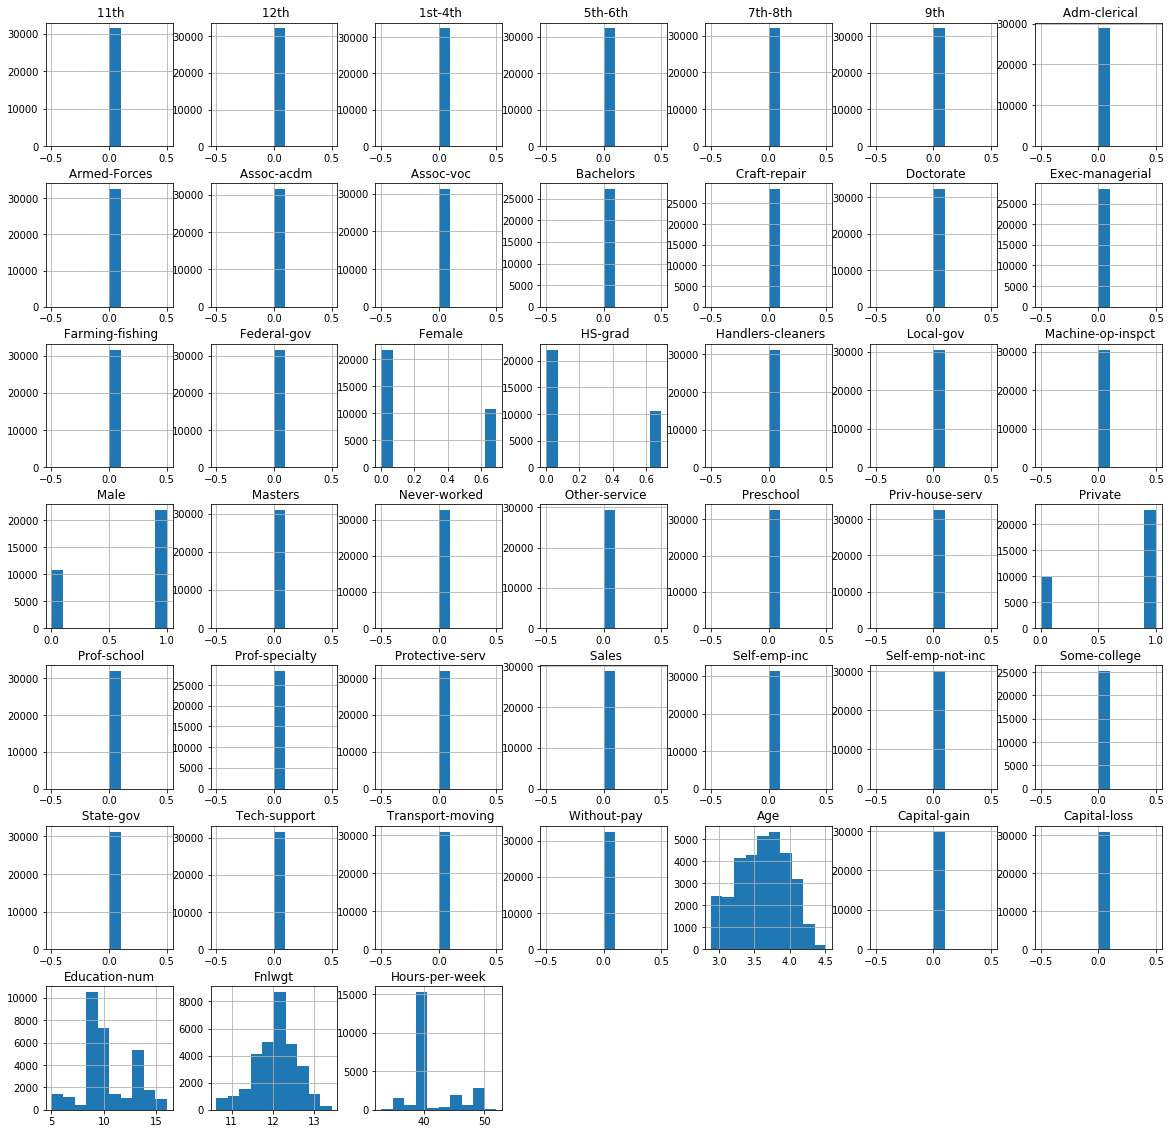

In [31]:
df_census_out.hist(figsize=(20,20))

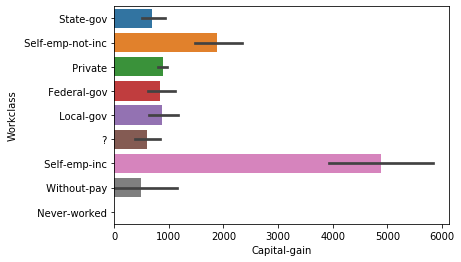

In [32]:
sns.barplot(x="Capital-gain",y="Workclass",data=df_census1)
plt.show()

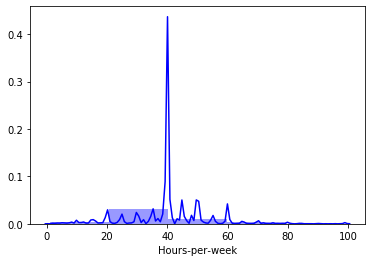

In [33]:
sns.distplot(df_census1['Hours-per-week'].dropna(),kde=True,color='blue',bins=5)

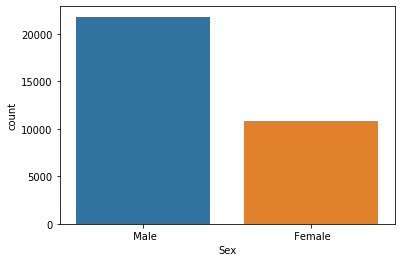

In [34]:
sns.countplot(x='Sex',data=df_census1)

More number of males are there in the dataset.

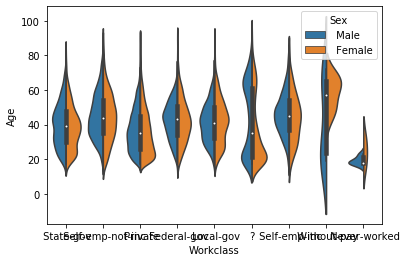

In [35]:
sns.violinplot(x="Workclass",y="Age",hue="Sex",data=df_census1,split=True)

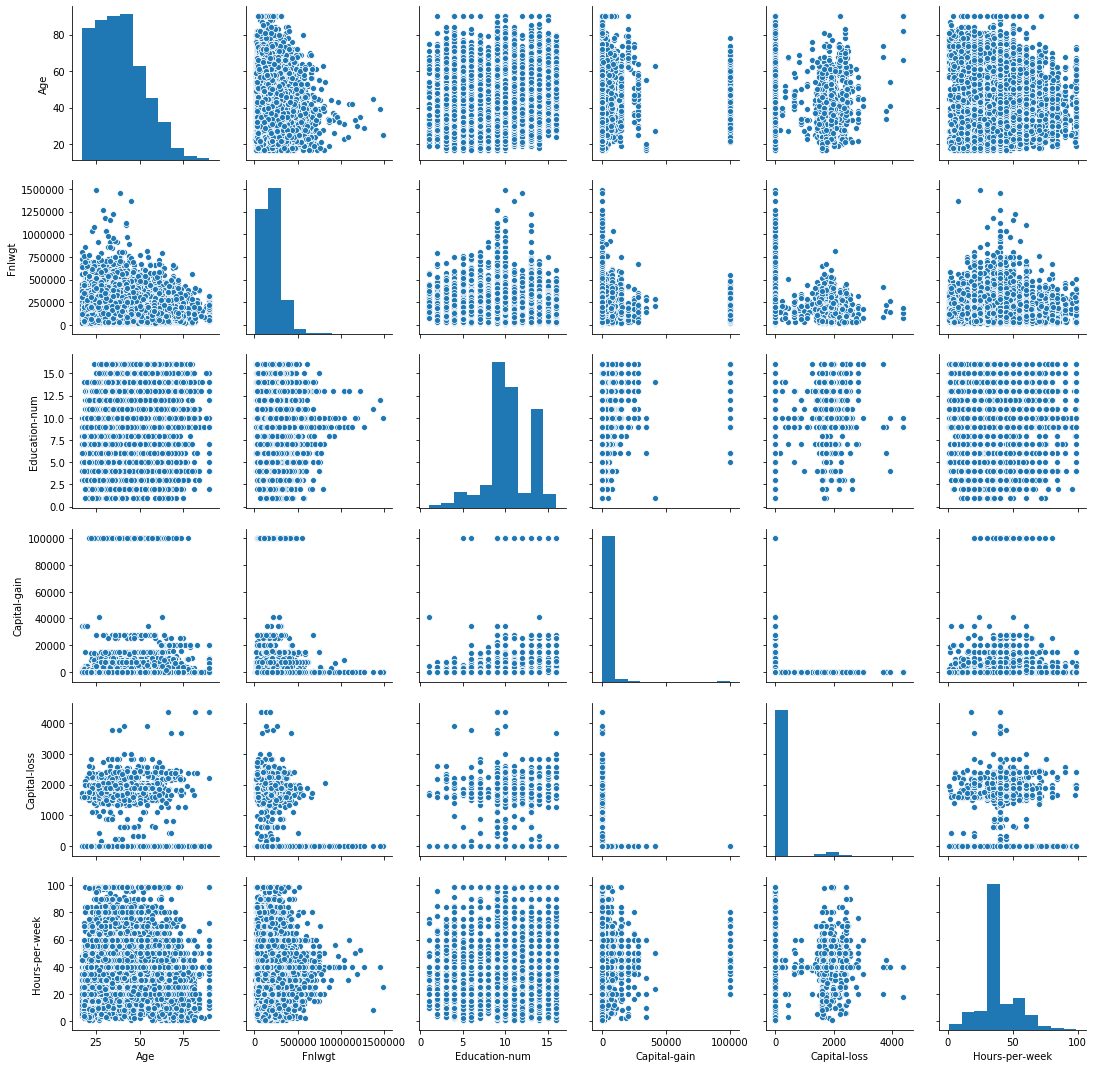

In [36]:
sns.pairplot(df_census1)

# Data Training and Testing

In [37]:
#Splitting the dataset
x=df_census2
y=df_census.iloc[:,-1]
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: Income Range, Length: 32561, dtype: object

In [38]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [39]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Since we have to predict the Income range for each person based on the different independent features. We will apply Classification Modelling technique to find out the best possible accuracy.

In [40]:
from sklearn.svm import SVC

SV=SVC(C=1,kernel='linear',random_state=0)
SV.fit(x_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [41]:
y_pred=SV.predict(x_test)

In [42]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [43]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [44]:
accuracy

0.8210293575727797

In [47]:
from sklearn.model_selection import cross_val_score

cross_val=cross_val_score(SV,x,y,cv=10,scoring='accuracy').mean()
cross_val

0.8218422482968079

Predictive Modeling shows 82% of accuracy for our given dataset.

In [48]:
# Saving the model

from sklearn.externals import joblib

joblib.dump(accuracy,'Census_Income.pkl')

['Census_Income.pkl']